# Importa bibliotecas

In [1]:
import os
path = os.path.abspath('')
# print(path)
items = os.listdir(path)
if 'Funcoes_GETS.py' not in items:
    ! jupyter nbconvert --to 'python' Funcoes_GETS.ipynb
import Funcoes_GETS as fg

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from bqplot import pyplot as bqplt
import bqplot as bq
%matplotlib notebook 

# Carrega banco de dados

In [2]:
equips_data = fg.get_all_equips_data()
OS_data = fg.get_all_OS_data()
OS_data = OS_data.dropna(subset=['Tipo Equip.'])
material_cost_data = fg.load_material_cost_data()
external_cost_data = fg.load_external_cost_data()
# equip_type = np.sort(equips_data['Tipo Equipamento'].unique())
equip_type = np.sort(equips_data['Tipo Equipamento'].unique())

# Gera interface

In [3]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [33]:
def update_data(equip,start_date,end_date):
    import pandas as pd
    import numpy as np
    from datetime import date
    today = pd.to_datetime(date.today()).to_numpy()
    if len(equip)==1:
        equip = equip[0]
    available_equips, equip_amount_data = fg.get_available_equip(equip,equips_data,OS_data)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x_data1,y_data1,x_data2,y_data2 = fg.arrange_equip_data_to_plot(available_equips,equip_amount_data,start_date,end_date)
    
    #Checks for empty data (necessary to adjust y axis limits)
    empty_flag1,between_two_dates1 = fg.check_for_empty_data(equip_amount_data,start_date,end_date)
    empty_flag2,between_two_dates2 = fg.check_for_empty_data(available_equips,start_date,end_date)
    if empty_flag2==False:
        ymin = np.amin(available_equips[between_two_dates2]['Quantidade Disponível'].values.astype(int))
    else:
        ymin = 0
    if empty_flag1==False:
        ymax = np.amax(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
    else:
        ymax = np.amax(equip_amount_data['Quantidade de Equipamentos'].values.astype(int))
    return(x_data1,y_data1,x_data2,y_data2,ymin,ymax)

def update_data2(equip,start_date,end_date):
    import pandas as pd
    if len(equip)==1:
        equip = equip[0]
    #TEMP###
    available_equips, equip_amount_data = fg.get_available_equip(equip,equips_data,OS_data)
    ######
    material_monthly_cost = fg.get_equip_monthly_cost(equip,material_cost_data)
    external_monthly_cost = fg.get_equip_monthly_cost(equip,external_cost_data)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x_data1,y_data1,x_data2,y_data2,x_data3,y_data3 = fg.arrange_cost_data_to_plot(material_monthly_cost,external_monthly_cost,equip_amount_data,start_date,end_date)
    #Checks for empty data (necessary to adjust y axis limits)
    empty_flag1,between_two_dates1 = fg.check_for_empty_data(equip_amount_data,start_date,end_date)
    empty_flag2,between_two_dates2 = fg.check_for_empty_data(material_monthly_cost,start_date,end_date)
    empty_flag3,between_two_dates3 = fg.check_for_empty_data(external_monthly_cost,start_date,end_date)
    
    if empty_flag1==False:
        ymin = np.amin(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
        ymax = np.amax(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
    else:
        ymin = 0
        ymax = np.amax(equip_amount_data['Quantidade de Equipamentos'].values.astype(int))
    
    if selected_analysis.value==1:
        if empty_flag2==False:
            ymax2 = np.amax(material_monthly_cost[between_two_dates2].values)
        else:
            ymax2 = 1
    elif selected_analysis.value==2:
        if empty_flag3==False:
            ymax2 = np.amax(external_monthly_cost[between_two_dates3].values)
        else:
            ymax2 = 1
    else:
        if empty_flag2==False:
            if empty_flag3==False:
                # matches lenghts of x_data2 with x_data3 (add missing dates in x_data and add zeros in missing y_data) 
                i=0
                while x_data3[i] < x_data2[i]:
                    x_data2 = np.insert(x_data2,i,x_data3[i])
                    y_data2 = np.insert(y_data2,0,0)
                    i+=1
                i=0
                while x_data2[i] < x_data3[i]:
                    x_data3 = np.insert(x_data3,i,x_data2[i])
                    y_data3 = np.insert(y_data3,0,0)
                    i+=1
                if len(x_data2)>len(x_data3):
                    y_data3 = np.append(y_data3,np.zeros(len(x_data2)-len(x_data3)))
                    x_data3 = np.append(x_data3,x_data2[len(x_data3):])
                    x_data3 = pd.to_datetime(x_data3)
                elif len(x_data2)<len(x_data3):
                    y_data2 = np.append(y_data2,np.zeros(len(x_data3)-len(x_data2)))
                    x_data2 = np.append(x_data2,x_data3[len(x_data2):])
                    x_data2 = pd.to_datetime(x_data2)
                
                ymax2 = np.amax(np.concatenate((material_monthly_cost[between_two_dates2].values,
                                               external_monthly_cost[between_two_dates3].values)))
            else:
                ymax2 = np.amax(material_monthly_cost[between_two_dates2].values)
        else:
            if empty_flag3==False:
                 ymax2 = np.amax(external_monthly_cost[between_two_dates3].values)
            else:
                ymax2 = 1
    
    
    return(x_data1,y_data1,x_data2,y_data2,x_data3,y_data3,ymin,ymax,ymax2)

title = widgets.Label(value="Interface de Análise Temporal do GETS",
                      layout=widgets.Layout(border= '2px solid black',width='100%', display='flex', align_items='center',
                                           justify_content='center'))

tab_titles = ['Quantidade','Custo']
tab = widgets.Tab()
[tab.set_title(i, title) for i, title in enumerate(tab_titles)]

fig = bq.Figure()
buttonWidth = '60px'

# tb_ = bq.Toolbar(figure=fig)
save_data_button = widgets.Button(
    description = 'save',
    tooltip='Save current data',
    icon = 'fa-file-excel-o'
)
save_data_button.layout.width = '90px'
save_button = widgets.Button(
    description = 'Save',
    button_style='success'
)

save_fig_button= widgets.Button(
    description = 'save',
    tooltip='Save current figure',
    icon = 'file-image-o',
)
save_fig_button.layout.width = '90px'
tb = widgets.HBox()
# print('children=',tb.children)
fig2 = bq.Figure()
tb2 = widgets.HBox()

file_types = [('.csv',1), ('.xls',2),('.txt',3)]
selected_file_type = widgets.Dropdown(
    options=file_types,
    value=1,
    description='Tipo:',
    disabled=False,
)

selected_equips = widgets.Combobox(
    options=equip_type.tolist(),
    placeholder='Ex: VENTILADOR UTI',
    value='',
    #rows=10,
    ensure_option=True,
    disabled=False
)

from ipyfilechooser import FileChooser
# Create and display a FileChooser widget
fc = FileChooser(os.path.abspath(os.getcwd()))
# Show or hide folder icons
fc.use_dir_icons = True
# # Switch to folder-only mode
# fc.show_only_dirs = True
fc.default_filename = selected_equips.value + ' output'
# Change the title (use '' to hide)
fc.title = 'Salvar como...'

data_type_and_save_box = widgets.HBox([selected_file_type,save_button])
save_box = widgets.VBox([fc,data_type_and_save_box])

label1 = widgets.Label(value="Tipo de Medida:")
label2 = widgets.Label(value="Equipamento:")
label3 = widgets.Label(value="Data Inicial:")
label4 = widgets.Label(value="Data Final:")
label5 = widgets.Label(value="Mostrar Tendência?")
error_msg = ''
error_label = widgets.Label(value= '')

analysis_types = [('Custo Total de Material/Mes',1), ('Custo Total de Serviço Externo/Mes',2),('Custos Totais/Mes',3)]
selected_analysis = widgets.Dropdown(
    options=analysis_types,
    value=1,
    description='',
    disabled=False,
)

tendency = widgets.Checkbox(
    value=False,
    description='Mostrar linha de tendência',
    disabled=False,
    indent=False
)
# hbox = widgets.HBox([label5, tendency],layout=widgets.Layout(display='flex',align_items='stretch'))
selected_start_date = widgets.DatePicker(
    description='',
    disabled=False,
    value=pd.to_datetime('2013-01-01')
)
selected_end_date = widgets.DatePicker(
    description='',
    disabled=False,
    value=pd.to_datetime('2020-09-01')
)

#########TOOLBAR#######
from bqplot.interacts import PanZoom
from traitlets import link
from collections import OrderedDict

pz = PanZoom()
pzx = PanZoom()
pzy = PanZoom()

zoom_interacts = widgets.ToggleButtons(
                                        options=OrderedDict([
                                            ('xy ', pz), 
                                            ('x ', pzx), 
                                            ('y ', pzy),   
                                            (' ', None)]),
                                            icons = ["arrows", "arrows-h", "arrows-v", "stop"],
                                            tooltips = ["zoom/pan in x & y", "zoom/pan in x only", "zoom/pan in y only", "cancel zoom/pan"]
                                        )
zoom_interacts.style.button_width = buttonWidth
ResetZoomButton = widgets.Button(
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Reset zoom',
    icon='refresh'
)

global ymin, ymax, ymax2
ymin = 0
ymax = 1
ymax2 = 1
def resetZoom(new):
    # Reset the x and y axes on the figure
    fig.axes[0].scale.min = selected_start_date.value
    fig.axes[1].scale.min = float(ymin)
    fig.axes[0].scale.max = selected_end_date.value
    fig.axes[1].scale.max = float(ymax)

ResetZoomButton.on_click(resetZoom)
ResetZoomButton.layout.width = buttonWidth

l = link((zoom_interacts, 'value'), (fig, 'interaction'))
#############END TOOLBAR###################

#########TOOLBAR#######
pz2 = PanZoom()
pzx2 = PanZoom()
pzy2 = PanZoom()

zoom_interacts2 = widgets.ToggleButtons(
                                        options=OrderedDict([
                                            ('xy ', pz2), 
                                            ('x ', pzx2), 
                                            ('y ', pzy2),   
                                            (' ', None)]),
                                            icons = ["arrows", "arrows-h", "arrows-v", "stop"],
                                            tooltips = ["zoom/pan in x & y", "zoom/pan in x only", "zoom/pan in y only", "cancel zoom/pan"]
                                        )
zoom_interacts2.style.button_width = buttonWidth
ResetZoomButton2 = widgets.Button(
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Reset zoom',
    icon='refresh'
)

def resetZoom2(new):
    # Reset the x and y axes on the figure
    fig2.axes[0].scale.min = selected_start_date.value
    fig2.axes[1].scale.min = float(ymin)
    fig2.axes[0].scale.max = selected_end_date.value
    fig2.axes[1].scale.max = float(ymax)
    fig2.axes[2].scale.min = 0
    fig2.axes[2].scale.max = float(ymax2)

ResetZoomButton2.on_click(resetZoom2)
ResetZoomButton2.layout.width = buttonWidth

link((zoom_interacts2, 'value'), (fig2, 'interaction'))
#############END TOOLBAR###################

def on_change(b):
    error_label.value = ''
    if selected_start_date.value==None:
        error_msg = 'Por \ favor \ selecione \ uma \ data \ inicial!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    elif selected_end_date.value==None:
        error_msg = 'Por \ favor \ selecione \ uma \ data \ final!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    elif selected_equips.value=='':
        error_msg = 'Por \ favor \ selecione \ um \ equipamento!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    else:
        global ymin, ymax, ymax2
        if tab.selected_index==0:
#             try:
#                 l.unlink()
#             except UnboundLocalError:
#                 print('first time')
#             fig.interaction = None
#             bq.pyplot.clear()

            x_data1,y_data1,x_data2,y_data2,ymin,ymax = update_data(selected_equips.value,selected_start_date.value,selected_end_date.value)
            
        
            global yo, xo
            yo = y_data2
            xo = x_data2
        
            x_dt = bq.DateScale()
            y_sc = bq.LinearScale()
            interp = 'linear'
            def_tt = bq.Tooltip(fields=['x', 'y'], formats=['%d-%b-%y', 'd'],labels=['Data','Quant.'])
            print('len of x_data2=',len(x_data2))
            # Does not put tooltip if data length is too big (to avoid slow pan/zoom interaction)
            scatter1 = bq.Scatter(x=x_data1, y=y_data1, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                      scales={'x': x_dt, 'y': y_sc}, tooltip=def_tt)
            line1 = bq.Lines(x=x_data1, y=y_data1, scales={'x': x_dt, 'y': y_sc}, display_legend=True, labels=['Ativo'],
                             interpolation=interp)
            line1.fill = 'bottom'
            line1.marker = 'square'
            line1.marker_size = 20
            line1.fill_opacities = [0.2]
            
#             # Does not put tooltip if data length is too big (to avoid slow pan/zoom interaction)
#             if len(x_data2)>500:
#                 scatter2 = bq.Scatter(x=x_data2, y=y_data2, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
#                                   scales={'x': x_dt, 'y': y_sc})
#             else:
            scatter2 = bq.Scatter(x=x_data2, y=y_data2, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                  scales={'x': x_dt, 'y': y_sc}, tooltip=def_tt)
            line2 = bq.Lines(x=x_data2, y=y_data2, scales={'x': x_dt, 'y': y_sc}, display_legend=True, 
                             labels=['Disponivel'],interpolation=interp)
            line2.fill = 'bottom'
            line2.marker = 'circle'
            line2.fill_opacities = [0.2]
            line2.colors = ['DarkOrange']
            line2.marker_size = 8
            line2.opacities = [.5]

            ax_x = bq.Axis(scale=x_dt, label='Data', 
                          tick_style={'stroke': 'black', 'font-size': 12}, tick_format="%b %Y", num_ticks=8)
            x_dt.min = pd.to_datetime(selected_start_date.value)
            x_dt.max = pd.to_datetime(selected_end_date.value)
#             ax_x.tick_rotate=-45
            if (pd.to_datetime(selected_end_date.value) - pd.to_datetime(selected_start_date.value)).days<240:
                ax_x.tick_format = "%d-%b-%y"
            
            ax_y = bq.Axis(scale=y_sc, orientation='vertical', label='Quantidade de Equipamentos', 
                           label_style={'stroke': 'black', 'font-size': 12},
                           tick_style={'stroke': 'black', 'font-size': 12},grid_lines='none')
            y_sc.min = np.around(0.9*ymin)
            y_sc.max = np.around(1.1*ymax)

            fig.marks = [line1,line2,scatter1,scatter2]
            fig.axes = [ax_x,ax_y]
            fig.legend_location = 'top-left'
            
            pz.scales={'x': [x_dt], 'y': [y_sc]}
            pzx.scales={'x': [x_dt]}
            pzy.scales={'y': [y_sc], }
            
            print(pz)
            
            tb.children = ()
            tb.children += (widgets.HBox([zoom_interacts,ResetZoomButton,save_data_button,save_fig_button]),)
#             widgets.VBox([fig, widgets.HBox([zoom_interacts,ResetZoomButton])], align_self='stretch')
            
        else:
            x_data1,y_data1,x_data2,y_data2,x_data3,y_data3,ymin,ymax,ymax2 = update_data2(selected_equips.value,
                                                                                           selected_start_date.value,
                                                                                           selected_end_date.value)
            x_dt = bq.DateScale()
            y_sc1 = bq.LinearScale()
            y_sc2 = bq.LinearScale()
            interp = 'linear'
            def_tt = bq.Tooltip(fields=['x', 'y'], formats=['%d-%b-%y', 'd'],labels=['Data','Quant.'])
            scatter1 = bq.Scatter(x=x_data1, y=y_data1, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                  scales={'x': x_dt, 'y': y_sc1}, tooltip=def_tt)
            line1 = bq.Lines(x=x_data1, y=y_data1, scales={'x': x_dt, 'y': y_sc1}, display_legend=True, 
                             labels=['Ativo'],interpolation=interp)
            line1.fill = 'bottom'
            line1.marker = 'square'
            line1.marker_size = 20
            line1.fill_opacities = [0.2]
            def_tt2 = bq.Tooltip(fields=['x', 'y'], formats=['%b %Y', '.2f'],labels=['Mês/Ano','Custo'])
            bar2 = bq.Bars(x=x_data2,y=y_data2, scales={'x': x_dt, 'y': y_sc2},tooltip=def_tt2,display_legend=True, 
                             labels=['Materiais'])
            bar2.colors = ['Red']
            bar2.opacities = [0.5]
            
            bar3 = bq.Bars(x=x_data3,y=y_data3, scales={'x': x_dt, 'y': y_sc2},tooltip=def_tt2,display_legend=True, 
                             labels=['Serviços Externos'])
            bar3.colors = ['Orange']
            bar3.opacities = [0.5]
            
            ax_x = bq.Axis(scale=x_dt, label='Data', xlim=(selected_start_date.value,selected_end_date.value),
                          tick_style={'stroke': 'black', 'font-size': 12}, tick_format="%b %Y", num_ticks=8)
            x_dt.min = pd.to_datetime(selected_start_date.value)
            x_dt.max = pd.to_datetime(selected_end_date.value)
#             ax_x.tick_rotate=-45
            if (pd.to_datetime(selected_end_date.value) - pd.to_datetime(selected_start_date.value)).days<240:
                ax_x.tick_format = "%d-%b-%y"
            
            ax_y1 = bq.Axis(scale=y_sc1, orientation='vertical', label='Quantidade de Equipamentos',
                            tick_style={'stroke': 'black', 'font-size': 12},grid_lines='none')
            ax_y2 = bq.Axis(scale=y_sc2, orientation='vertical', label=selected_analysis.label, 
                            side='right', label_color='OrangeRed',color='red',label_offset='3.5em',
                           tick_style={'stroke': 'OrangeRed', 'font-size': 12},grid_lines='dashed',grid_color='OrangeRed')
            y_sc1.min = np.around(0.9*ymin)
            y_sc1.max = np.around(1.1*ymax)
            y_sc2.min = 0
            y_sc2.max = 1.1*ymax2
            if selected_analysis.value==1:
                fig2.marks = [line1,bar2,scatter1]
            elif selected_analysis.value==2:
                fig2.marks = [line1,bar3,scatter1]
            else:
                bar = bq.Bars(x=x_data2,y=[y_data2,y_data3], scales={'x': x_dt, 'y': y_sc2}, type='grouped',
                              colors=['Red','Orange'],tooltip=def_tt2,display_legend=True, 
                             labels=['Materiais','Serviços Externos']) 
                bar.opacities = [0.5, 0.5]
                fig2.marks = [line1,bar,scatter1]

            bar2.interactions = {
                'legend_hover': 'highlight_axes',
                'hover': 'tooltip', 
            }
            
            fig2.axes = [ax_x,ax_y1,ax_y2]
            print(fig2.axes)
            fig2.legend_location = 'top-left'
            
            pz2.scales={'x': [x_dt], 'y': [y_sc1,y_sc2]}
            pzx2.scales={'x': [x_dt]}
            pzy2.scales={'y': [y_sc1,y_sc2], }
            
            print(pz2)
            
            tb2.children = ()
            tb2.children += (widgets.HBox([zoom_interacts2,ResetZoomButton2,save_data_button,save_fig_button]),)

def show_tendency(b):
    print(b)
def on_save_data(b):
    error_label.value = ''
    if selected_start_date.value==None:
        error_msg = 'Por \ favor \ selecione \ uma \ data \ inicial!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    elif selected_end_date.value==None:
        error_msg = 'Por \ favor \ selecione \ uma \ data \ final!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    elif selected_equips.value=='':
        error_msg = 'Por \ favor \ selecione \ um \ equipamento!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    else:
        save_box.layout.visibility = 'visible'

def on_save_figure(b):
    error_label.value = ''
    if tab.selected_index==0:
        fig_file_name = selected_equips.value + ' Ativos DE ' + selected_start_date.value.strftime('%Y-%m-%d') + ' A ' + selected_end_date.value.strftime('%Y-%m-%d')
#         fig_file_path = os.path.join('./',fig_file_name,'.png')
        fig.save_png(fig_file_name)
    else:
        fig_file_name = selected_equips.value + ' Custos DE ' + selected_start_date.value.strftime('%Y-%m-%d') + ' A ' + selected_end_date.value.strftime('%Y-%m-%d')
#         fig_file_path = os.path.join('./',fig_file_name,'.png')
        fig2.save_png(fig_file_name)
        
def on_save(b):
    error_label.value = ''
    if fc.selected==None:
        error_msg = 'Por \ favor \ selecione \ uma \ pasta!'
        error_label.value = r'\(\color{red} {' + error_msg + '}\)'
    else:
        global ymin, ymax, ymax2
        if tab.selected_index==0:
            x_data1,y_data1,x_data2,y_data2,ymin,ymax = update_data(selected_equips.value,selected_start_date.value,selected_end_date.value)
            d = {'Datas': x_data2, 'Disponivel': y_data2}
            df1 = pd.DataFrame(data=d)
            d = {'Datas2': x_data1, 'Ativos': y_data1}
            df2 = pd.DataFrame(data=d)
            df = pd.concat([df1,df2],axis=1)

            filepath = os.path.join(fc.selected_path,fc.selected_filename)

            if selected_file_type.value==1:
                file = filepath + '.csv'
                df.to_csv(file, index=False)
            elif selected_file_type.value==2:
                file = filepath + '.xls'
                df.to_excel(file, index=False)
            else:
                file = filepath + '.txt'
                df.loc[:,'Datas'] = df.loc[:,'Datas'].dt.strftime('%d/%m/%Y')
                df.loc[:,'Datas2'] = df.loc[:,'Datas2'].dt.strftime('%d/%m/%Y')
                df.fillna('', inplace=True)
                np.savetxt(file, df.values, fmt='%s',header='Data\tDisponivel\tData2\tAtivo')
            save_box.layout.visibility = 'hidden'
        else:
            x_data1,y_data1,x_data2,y_data2,x_data3,y_data3,ymin,ymax,ymax2 = update_data2(selected_equips.value,
                                                                                           selected_start_date.value,
                                                                                           selected_end_date.value)
            d = {'Datas': x_data1, 'Ativos': y_data1}
            df1 = pd.DataFrame(data=d)
            d = {'Datas2': x_data2, 'Custo de Material': y_data2}
            df2 = pd.DataFrame(data=d)
            d = {'Datas3': x_data3, 'Custo de Servico Externo': y_data3}
            df3 = pd.DataFrame(data=d)
            df = pd.concat([df1,df2,df3],axis=1)

            filepath = os.path.join(fc.selected_path,fc.selected_filename)

            if selected_file_type.value==1:
                file = filepath + '.csv'
                df.to_csv(file, index=False)
            elif selected_file_type.value==2:
                file = filepath + '.xls'
                df.to_excel(file, index=False)
            else:
                file = filepath + '.txt'
                df.loc[:,'Datas'] = df.loc[:,'Datas'].dt.strftime('%d/%m/%Y')
                df.loc[:,'Datas2'] = df.loc[:,'Datas2'].dt.strftime('%d/%m/%Y')
                df.loc[:,'Datas3'] = df.loc[:,'Datas3'].dt.strftime('%d/%m/%Y')
                df.fillna('', inplace=True)
                np.savetxt(file, df.values, fmt='%s',header='Datas\tAtivos\tDatas2\tCusto de Material\tDatas3\tCusto de Servico Externo')
            save_box.layout.visibility = 'hidden'
    
selected_analysis.observe(on_change,names='value')
selected_equips.observe(on_change,names='value')
selected_start_date.observe(on_change,names='value')
selected_end_date.observe(on_change,names='value')
tab.observe(on_change,names='selected_index')
save_data_button.on_click(on_save_data)
save_button.on_click(on_save)
save_fig_button.on_click(on_save_figure)
tendency.observe(show_tendency,type='change')
# def on_pz(b):
#     print(b)
# pz.observe(on_pz,names='scales')



vbox = widgets.VBox([label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
              tendency,
#               button_plot,
              error_label
             ])

vbox2 = widgets.VBox([label1,
              selected_analysis,
              label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
#               button_plot,
              error_label
             ])

vbox_fig = widgets.VBox([fig,tb,save_box], align_self='stretch')#,layout=center_layout)
vbox_fig2 = widgets.VBox([fig2,tb2,save_box], align_self='stretch')#,layout=center_layout)
save_box.layout.visibility = 'hidden'

app = widgets.AppLayout(header=None,
          left_sidebar=vbox,
          center=vbox_fig,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= ''))

app2 = widgets.AppLayout(header=None,
          left_sidebar=vbox2,
          center=vbox_fig2,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= ''))

children = [app,app2]
tab.children = children

header = widgets.HBox()
header.children = [title]

main_app = widgets.VBox([header,tab])
main_app

len of x_data2= 5274
PanZoom(scales={'x': [DateScale(max=Timestamp('2020-09-01 00:00:00'), min=Timestamp('2013-01-01 00:00:00'))], 'y': [LinearScale(max=196.0, min=58.0)]})
len of x_data2= 2314
PanZoom(scales={'x': [DateScale(max=Timestamp('2020-09-01 00:00:00'), min=Timestamp('2013-01-01 00:00:00'))], 'y': [LinearScale(max=342.0, min=121.0)]})


LINKS: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html#Linking-Widgets
        aCHO QUE TEM  q por um observe pra atualizar algo na figura (interaction por exemplo)
        https://traitlets.readthedocs.io/en/stable/utils.html

            

In [35]:
import os
os.path.abspath(os.getcwd())

'Z:\\Programming\\GETS'

In [62]:
yo

array([  0,   1,   2, ..., 277, 276, 276])

In [78]:
ts = pd.Series(yo, index=xo)

In [79]:
ts1 = ts[ts.index>pd.to_datetime('2010')]

In [80]:
ts1['2020-11']

2020-11-03    276
dtype: int32

In [81]:
ts1_monthly = ts1.groupby(pd.Grouper(freq="MS")).mean()
ts1_monthly.fillna(method='ffill',inplace=True)

In [82]:
ts1_monthly

2010-03-01    141.700000
2010-04-01    142.833333
2010-05-01    141.500000
2010-06-01    139.500000
2010-07-01    135.500000
                 ...    
2020-07-01    277.478261
2020-08-01    279.076923
2020-09-01    278.750000
2020-10-01    278.750000
2020-11-01    276.000000
Freq: MS, Length: 129, dtype: float64

<IPython.core.display.Javascript object>


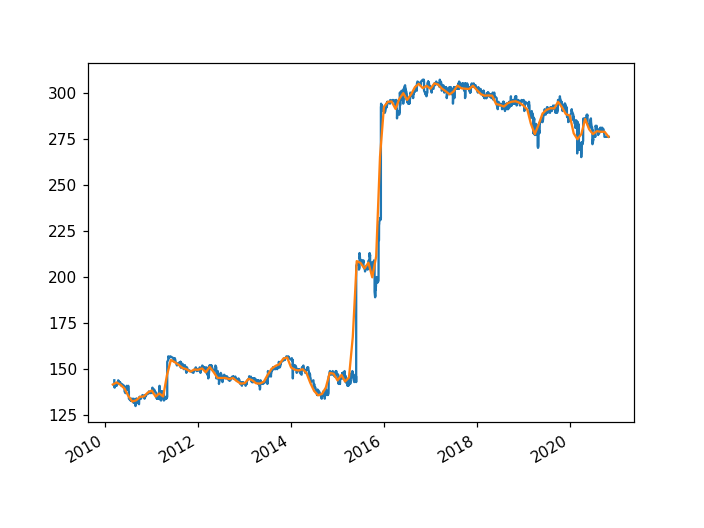

<AxesSubplot:>

In [83]:
ts1.plot()
ts1_monthly.plot()

In [41]:
from pmdarima.arima import auto_arima

Z:\anaconda3\envs\GETS_env3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Z:\anaconda3\envs\GETS_env3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
modelo_auto = auto_arima(ts1, m=12, trace=False)

In [ ]:
modelo_auto.summary()

In [ ]:
proximos12 = modelo_auto.predict(n_periods=12)

In [ ]:
proximos12

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
# modelo = ARIMA(ts1_monthly, order=(1,1,2),freq=ts1.index.inferred_freq)

modelo = ARIMA(ts1_monthly, order=(1,1,2))

In [85]:
modelo_treinado = modelo.fit()

In [86]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  128
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -418.192
Method:                       css-mle   S.D. of innovations              6.337
Date:                Tue, 03 Nov 2020   AIC                            846.383
Time:                        15:59:14   BIC                            860.643
Sample:                    04-01-2010   HQIC                           852.177
                         - 11-01-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0401      0.868      1.199      0.231      -0.661       2.741
ar.L1.D.y      0.4706      0.802      0.587      0.557      -1.101       2.042
ma.L1.D.y      0.1200      0.794      0.151      0.880      -1.437       1.677
ma.L2.D.y     -0.2978      0.474     -0.628      0.530      -1.227       0.631
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1250           +0.0000j            2.1250            0.0000
MA.1           -1.6420           +0.0000j            1.6420            0.5000
MA.2            2.0448           +0.0000j            2.0448            0.0000
-----------------------------------------------------------------------------
"""

In [87]:
a = modelo_treinado.forecast(steps=12)

<IPython.core.display.Javascript object>


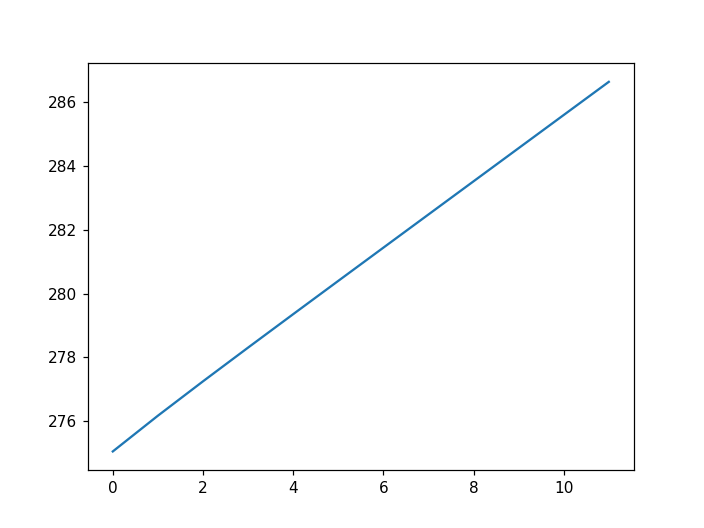

In [89]:
plt.plot(a[0])

<IPython.core.display.Javascript object>


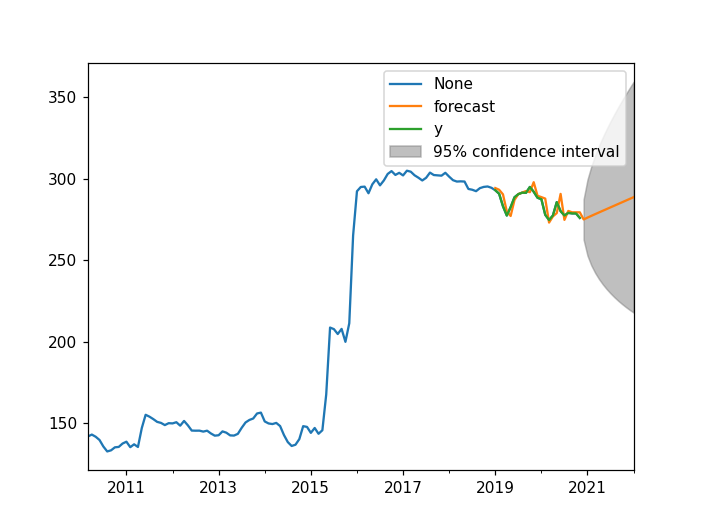

<IPython.core.display.Javascript object>


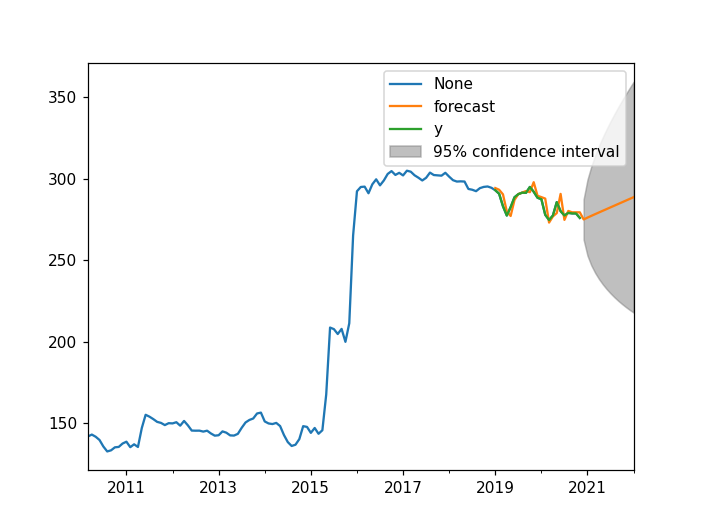

In [90]:
ax1 = ts1_monthly.plot()
modelo_treinado.plot_predict('2019','2022', ax=ax1, plot_insample=True)